### EfficientNet

Depth, Channel width, Resolution 즉 DWR 들이 커지면 좋지만 컴퓨터 성능의 한계와 과적합, 경사 소실등의 문제가 있을 수 있다 ⇒ 최적의 조합이 존재한다.

1. Depth : 신경 망의 층 수를 늘리는 방법
2. Channel width : 필터의 개수를 늘리는 방법
3. Resolution : input 사이즈의 크기를 크게 하는 방법

이 세 조합을 AutoML을 통해 찾은 모델 ⇒ 최적의 파라미터로 Stete Of The Art 달성

조합을 grid search 를 이용하여 찾는다. FLOPS 식 때문에 제곱을 이용

조건은 $\alpha \underline{>} 1, \beta \underline{>} 1, \gamma \underline{>} 1$

$$
\text{depth} : d = \alpha^\phi \\
\text{width} : w = \beta^\phi \\
\text{resolution} r : \gamma^\phi \\

\\

\\

\alpha \sdot \beta^2 \sdot \gamma^2

\simeq  2
$$

최종적으로 $(\alpha \sdot \beta^2 \sdot \gamma^2)^\phi$ 에 의해 결정, 또한 최종 FLOPS 는 $2^\phi$ 정도가 된다

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [11]:
model = EfficientNetB0(weights='imagenet')

I0000 00:00:1730447394.285779   10184 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:07:00.0, compute capability: 8.6


21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
# 이미지 로드, 전처리
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [13]:
# 이미지 입력, 분류
def classify_image(img_path):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    print('Predicted:', decode_predictions(preds, top=3)[0])
    return decode_predictions(preds, top=3)[0]

In [14]:
# 이미지 경로
img_path = '../../data/img_fish.png'

In [15]:
results = classify_image(img_path)

I0000 00:00:1730447404.446551   10550 service.cc:148] XLA service 0x7f017c003440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730447404.446590   10550 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-01 16:50:04.545703: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730447405.035134   10550 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted: [('n01443537', 'goldfish', np.float32(0.7999616)), ('n02606052', 'rock_beauty', np.float32(0.025767133)), ('n02607072', 'anemone_fish', np.float32(0.0040391893))]


I0000 00:00:1730447412.163561   10550 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


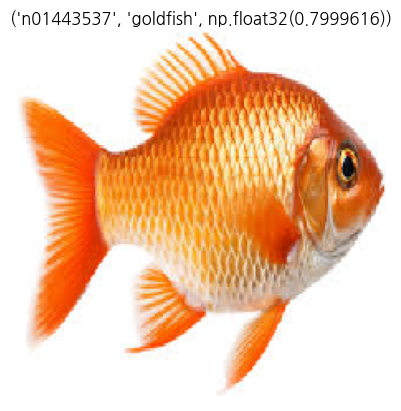

In [18]:
# 이미지, 분류 결과 시각화
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title(f'{results[0]}')
plt.show()